<a href="https://colab.research.google.com/github/tashir0605/Cocepts-And-Practice/blob/main/Pytorch/Dataset_and_DataLoader_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

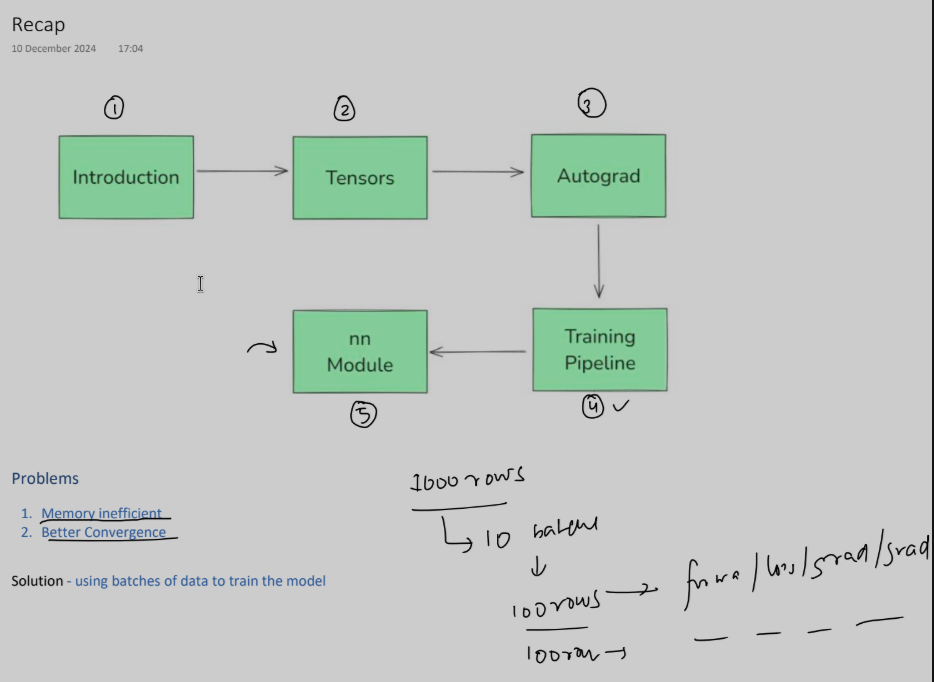

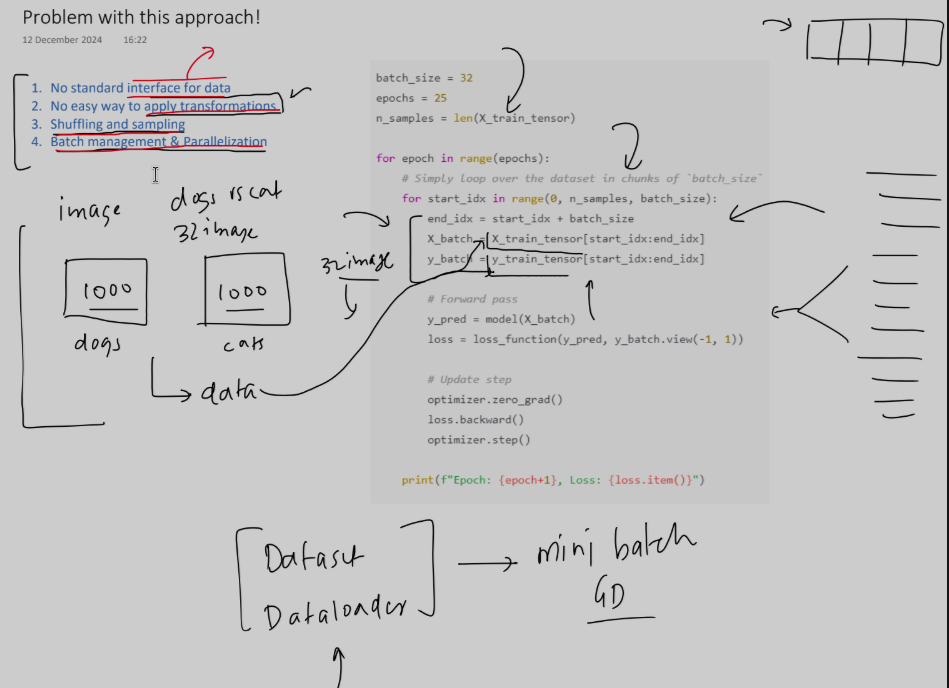

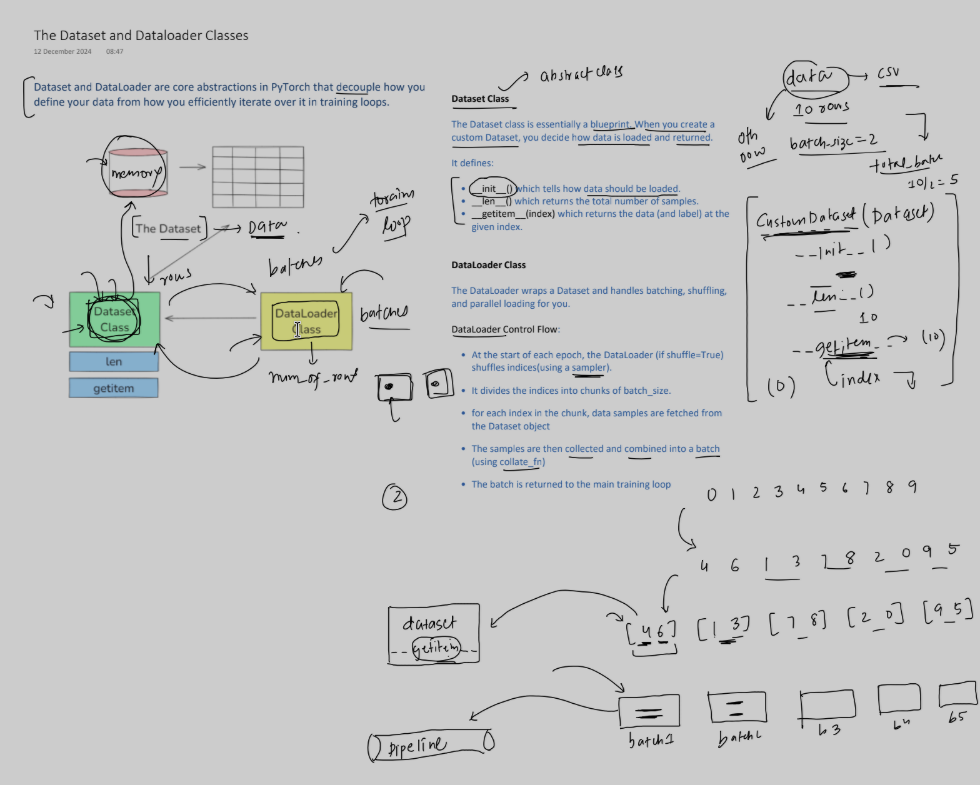

DataLoader class aapke saare indices ko uthata hai and usse suffle kr deta hai as given in the figure example of 0 to 9 indexes using **sampler**

jb batches bn jayenge as given [4,6],[1,3] ..... to useke baad pehle index 4 jayega customdataset class ke paas and uske getitem method ke pass and getitem methode see the index and return the that index row
usko neeche bhej diya as shown in the diagram, same for 6th index

ab mere paas 4th row and 6th row ka data hai

ab mujhe inn dono data ko collect krna hai and combine krke batch form krna hai and iss pure kaam ko krne ke liye hmare paas collate_fn hai in dataloader class.

1st batch created.

after saare batches bnn gye then uske baad batches ko training pipeline me bhejenge

In [1]:
from sklearn.datasets import make_classification
import torch

In [2]:
# Step 1: Create a synthetic classification dataset using sklearn
X, y = make_classification(
    n_samples=10,       # Number of samples
    n_features=2,       # Number of features
    n_informative=2,    # Number of informative features
    n_redundant=0,      # Number of redundant features
    n_classes=2,        # Number of classes
    random_state=42     # For reproducibility
)

In [3]:
X

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [4]:
X.shape

(10, 2)

In [5]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [6]:
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.long)

In [7]:
y.type

<function Tensor.type>

In [8]:
X.type

<function Tensor.type>

In [9]:
from torch.utils.data import Dataset,DataLoader

In [12]:
class CustomDataset(Dataset):
    def __init__(self,features,labels):
      self.features=features
      self.labels=labels


    def __len__(self):
      return self.features.shape[0]

    def __getitem__(self,index):
      return self.features[index],self.labels[index]

In [13]:
 dataset=CustomDataset(X,y)

In [14]:
len(dataset)

10

In [15]:
dataset[0]

(tensor([ 1.0683, -0.9701]), tensor(1))

In [16]:
 dataloader=DataLoader(dataset,batch_size=2,shuffle=True)

In [17]:
for batch_features, batch_labels in dataloader:

  print(batch_features)
  print(batch_labels)
  print("-"*50)

tensor([[-2.8954,  1.9769],
        [ 1.7273, -1.1858]])
tensor([0, 1])
--------------------------------------------------
tensor([[-0.9382, -0.5430],
        [-1.9629, -0.9923]])
tensor([1, 0])
--------------------------------------------------
tensor([[-0.5872, -1.9717],
        [ 1.0683, -0.9701]])
tensor([0, 1])
--------------------------------------------------
tensor([[1.8997, 0.8344],
        [1.7774, 1.5116]])
tensor([1, 1])
--------------------------------------------------
tensor([[-0.7206, -0.9606],
        [-1.1402, -0.8388]])
tensor([0, 0])
--------------------------------------------------


abhi tk to ham process kr hai after shuffling the index and then making the  bacthes of indexes only

1. 1st batch ke index ko customdataset ke paas bheja which cals the getitem(index)

2. then we get the row and then make the 1st batch.

this process is sequential and takes times

How about if we can make this process parallel matlab ki saare  indexes batches ek saath custom dataset ke paas jaa rhe hai in parallel manner and then making the batches simultaneously.

so in the DataLoader class there is method callled as **num_workers**

if we define num_workers=2 then 2 batches will be formed simultaneously in end and so on 2-2 krke batches bnenge.

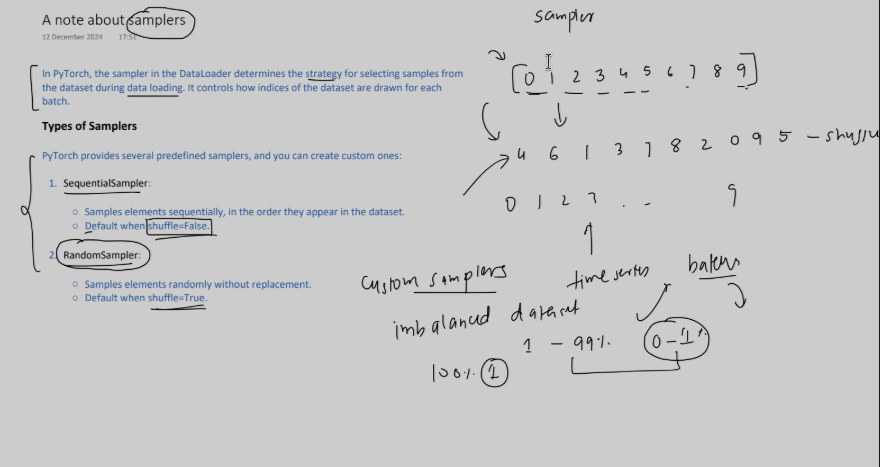

Why there could be the need of custom sampler, as ya to hum shuffle=True rkhe ya false

what is need of defining a custom sampler and where it can be used.

 * Just suppose ki tumhare paas imabalanced data hai jisme ek class ka data 99% and and only 1% for the other class.

 * and agar tumne predefined sampler use kiya to make the batches to aisa ho skta hai ki in most of the batches you will only get the class of majority data and the data for the 1% class would be missing in that batch.

 * To deal with such problem we define custom sampler in which we can manually code that I want representation of data in the batches as same as in the original datset i.e., in each batch 99:1 ratio.



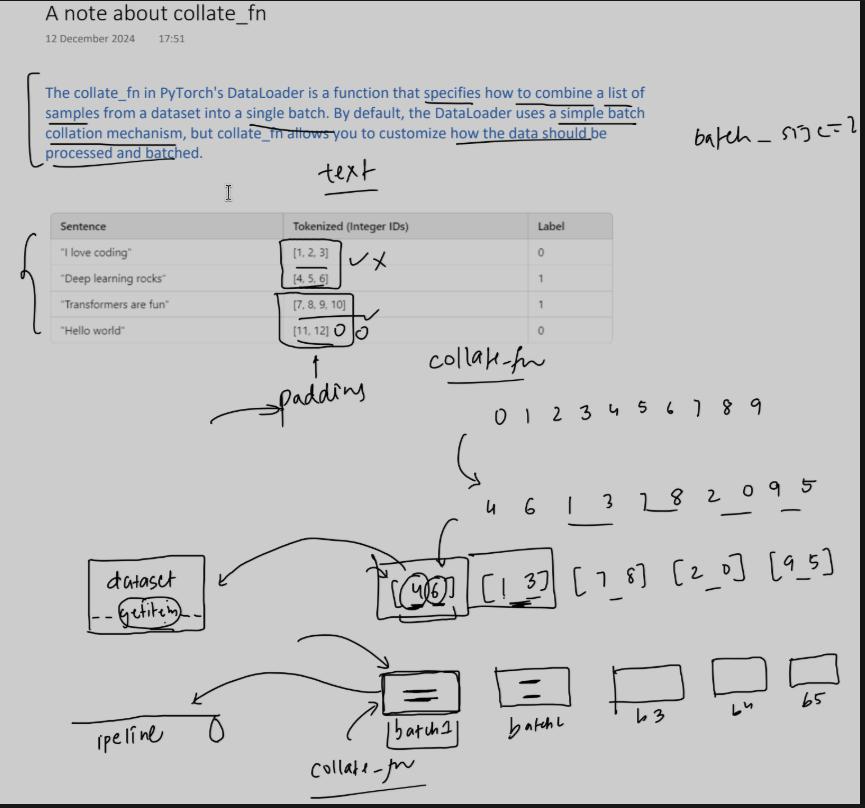

**collate_fn**

* collate fn wahi hai jo data aaya hai after processing the indexes and form it into batches.

* Ab ye swaal hai ki isme kya customize krne ki need padegi

* Iski need hai for example:

* Just suppose tumhare paas koi text data aata hai as shown in the above figure  to jo last ke 2 tensors hai unka ek batck bnana hai but tensors ka size alg alg hai to it's not possible to stack them , two unequal size tensor's can't be put together in a batch to hme manually chote size wale tensor ki padding krni padegi then will form a batch.



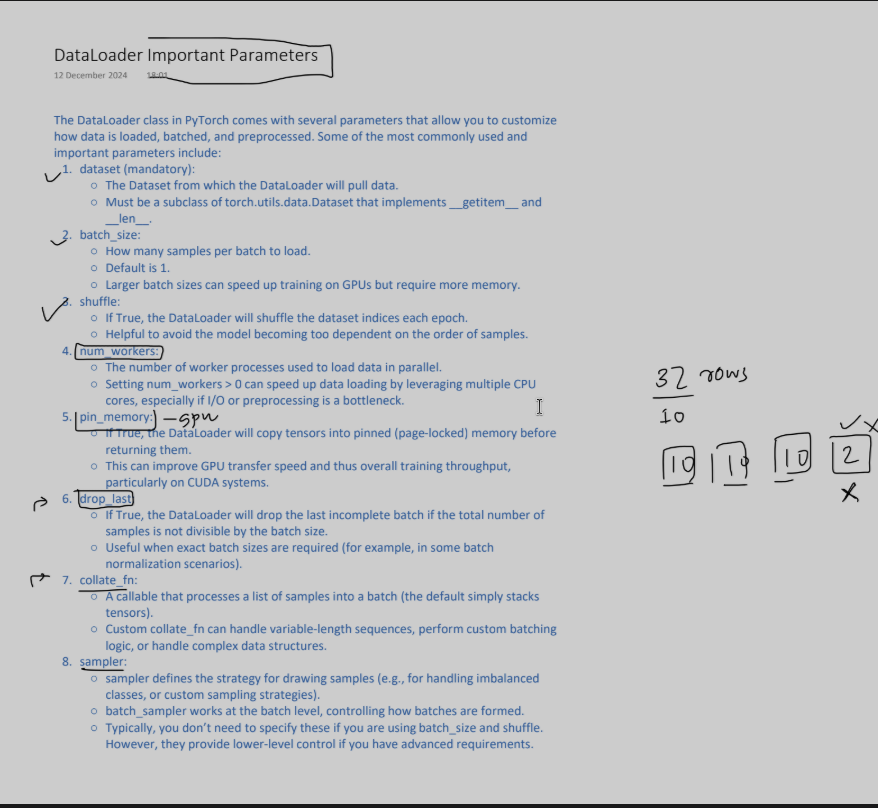